<a href="https://colab.research.google.com/github/ninadsutrave/MTP/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import tensorflow as tf
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from google.colab import drive

# Retrieving data

In [ ]:
drive.mount('/content/drive')

PTdata = pd.read_csv('/content/drive/My Drive/tempdata/model_data_PT.csv')
TTdata = pd.read_csv('/content/drive/My Drive/tempdata/model_data_TT.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [ ]:
def preprocess(data, trim):
  data = data.dropna()
  save = int(len(data) * (1 - trim))
  data = data.iloc[:save]
  return data

In [ ]:
PTdata = preprocess(PTdata, 0.2)
TTdata = preprocess(TTdata, 0.2)

y_data_PT = PTdata['tooltip'].values
x_data_PT_tempA = PTdata['temperatureA'].values
x_data_PT_tempB = PTdata['temperatureB'].values
x_data_PT_tempC = PTdata['temperatureC'].values

y_data_TT = TTdata['tooltip'].values
x_data_TT_tempA = TTdata['temperatureA'].values
x_data_TT_tempB = TTdata['temperatureB'].values
x_data_TT_tempC = TTdata['temperatureC'].values

# Custom Function

In [ ]:
def custom_function(x, a, b):
    return a * np.log(x) + b

# Model Training

In [ ]:
def fit(x, y):
  sample_size = len(x)  # Choose a smaller sample size
  indices = np.random.choice(len(x), sample_size, replace=False)
  x_sampled = x[indices]
  y_sampled = y[indices]

  # Set bounds for each parameter individually
  bounds = ([-100000, -100000], [100000, 100000])

  # Use curve_fit to optimize the parameters with bounds for each parameter
  params, covariance = curve_fit(custom_function, x_sampled, y_sampled, bounds=bounds, maxfev=10000)

  # Get the optimized parameters
  a, b = params

  additional_x = np.arange(60, 200.5, 0.5)

  y_pred = custom_function(x, a, b)

  return y_pred, params

In [ ]:
y_pred_PT_tempA, params_PT_tempA = fit(x_data_PT_tempA, y_data_PT)
y_pred_PT_tempB, params_PT_tempB = fit(x_data_PT_tempB, y_data_PT)
y_pred_PT_tempC, params_PT_tempC = fit(x_data_PT_tempC, y_data_PT)

In [ ]:
y_pred_TT_tempA, params_TT_tempA = fit(x_data_TT_tempA, y_data_TT)
y_pred_TT_tempB, params_TT_tempB = fit(x_data_TT_tempB, y_data_TT)
y_pred_TT_tempC, params_TT_tempC = fit(x_data_TT_tempC, y_data_TT)

# Prediction Plotting

In [ ]:
def plot(x, y, y_pred, params, title, xlabel, ylabel):
  plt.figure(figsize=(12,8))
  additional_x = np.arange(25, 200, 0.01)
  new_x = np.concatenate((x, additional_x))
  # Generate y values using the optimized parameters
  a, b  = params
  y_pred = custom_function(new_x, a, b)
  plt.scatter(new_x, y_pred, label='Predicted values', color='red', s=5)
  sample_size = 300  # Choose a smaller sample size
  indices = np.random.choice(len(x), sample_size, replace=False)
  x_sampled = x[indices]
  y_sampled = y[indices]
  plt.scatter(x_sampled, y_sampled, label='Actual data', marker='o', color='blue', s=1)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
  plt.show()

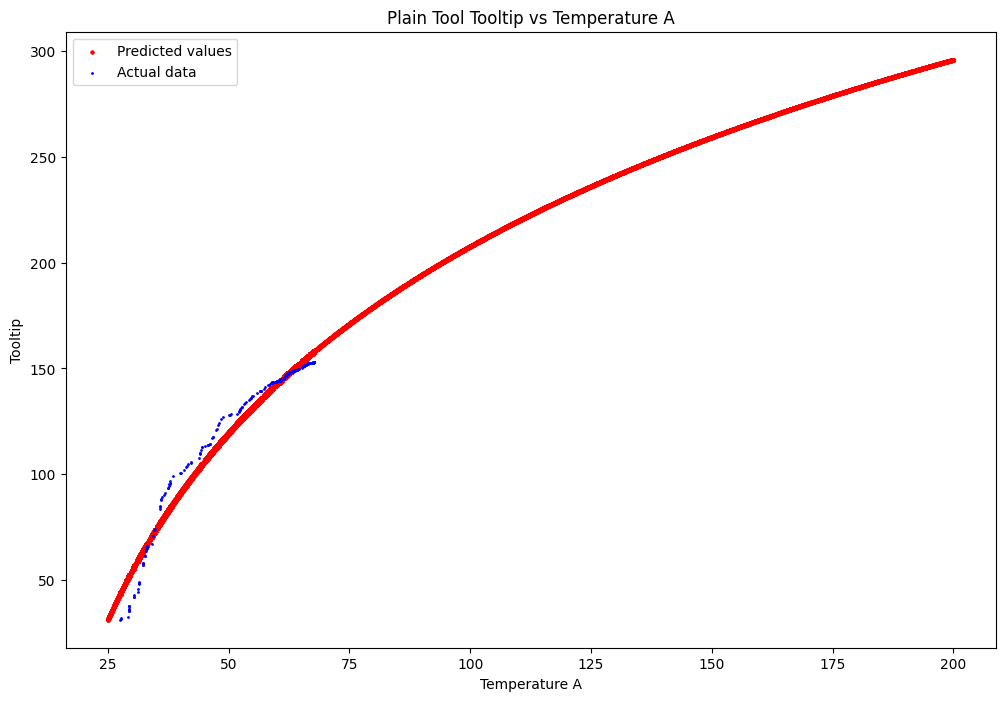

In [ ]:
plot(x_data_PT_tempA, y_data_PT, y_pred_PT_tempA, params_PT_tempA, 'Plain Tool Tooltip vs Temperature A', 'Temperature A', 'Tooltip')

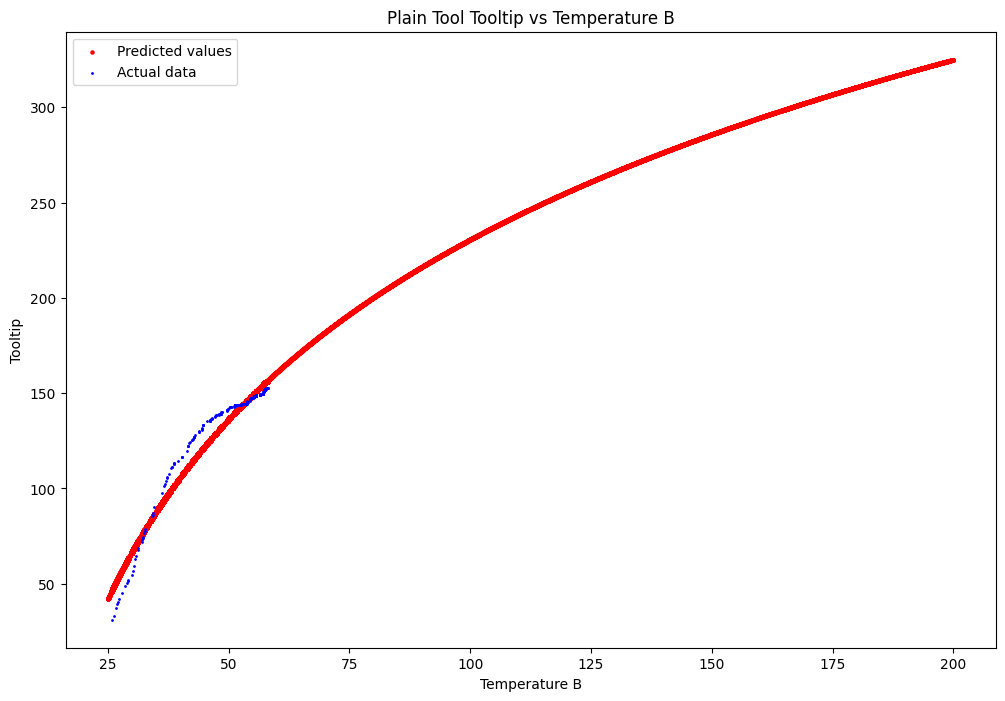

In [ ]:
plot(x_data_PT_tempB, y_data_PT, y_pred_PT_tempB, params_PT_tempB, 'Plain Tool Tooltip vs Temperature B', 'Temperature B', 'Tooltip')

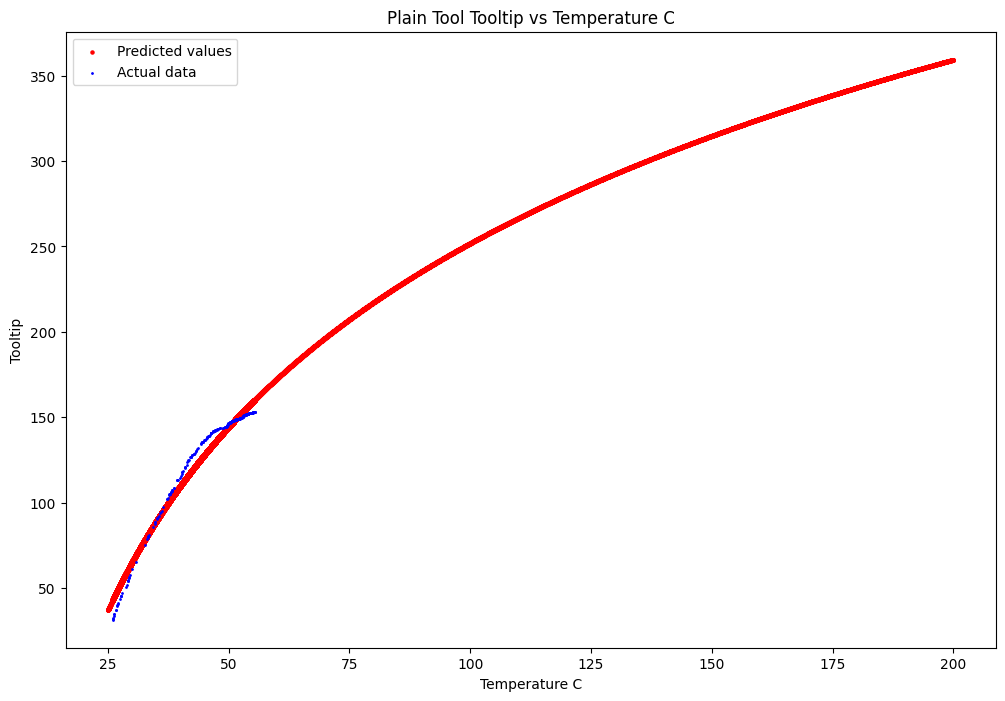

In [ ]:
plot(x_data_PT_tempC, y_data_PT, y_pred_PT_tempC, params_PT_tempC, 'Plain Tool Tooltip vs Temperature C', 'Temperature C', 'Tooltip')

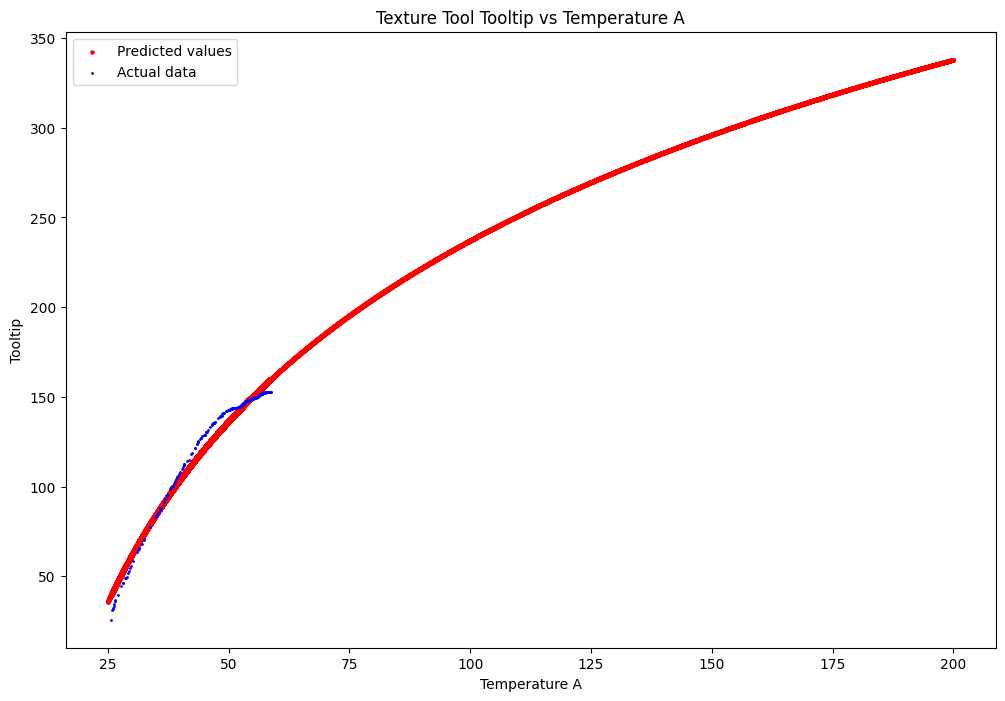

In [ ]:
plot(x_data_TT_tempA, y_data_TT, y_pred_TT_tempA, params_TT_tempA, 'Texture Tool Tooltip vs Temperature A', 'Temperature A', 'Tooltip')

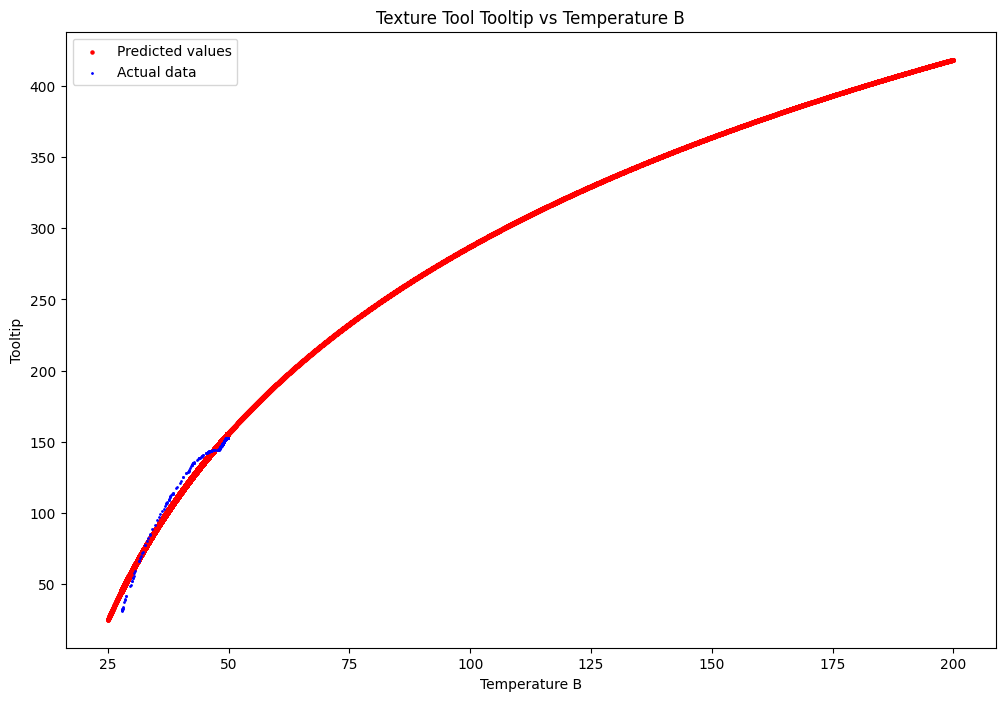

In [ ]:
plot(x_data_TT_tempB, y_data_TT, y_pred_TT_tempB, params_TT_tempB, 'Texture Tool Tooltip vs Temperature B', 'Temperature B', 'Tooltip')

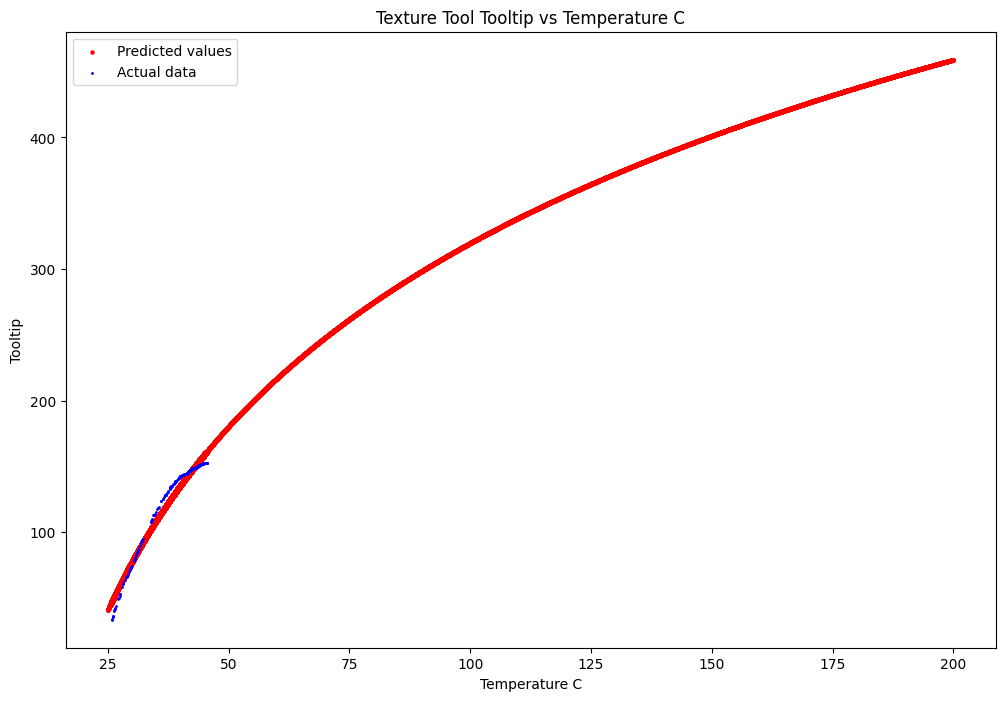

In [ ]:
plot(x_data_TT_tempC, y_data_TT, y_pred_TT_tempC, params_TT_tempC, 'Texture Tool Tooltip vs Temperature C', 'Temperature C', 'Tooltip')

# Model Evaluation

In [ ]:
def evaluate_model(y, y_pred):
  mse = mean_squared_error(y, y_pred)
  msle = mean_squared_log_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print("R-squared: ", r2)
  print("Mean Squared Log Error: ", msle)

In [ ]:
print("Plain Tool:")

print("Temperature A")
evaluate_model(y_data_PT, y_pred_PT_tempA)
print("\n")
print("Temperature B")
evaluate_model(y_data_PT, y_pred_PT_tempB)
print("\n")
print("Temperature C")
evaluate_model(y_data_PT, y_pred_PT_tempC)
print("\n")

print("Texture Tool:")

print("Temperature A")
evaluate_model(y_data_TT, y_pred_TT_tempA)
print("\n")
print("Temperature B")
evaluate_model(y_data_TT, y_pred_TT_tempB)
print("\n")
print("Temperature C")
evaluate_model(y_data_TT, y_pred_TT_tempC)

Plain Tool:
Temperature A
R-squared:  0.9685529628789596
Mean Squared Log Error:  0.006765128309835765


Temperature B
R-squared:  0.9580835033848093
Mean Squared Log Error:  0.006956341765294237


Temperature C
R-squared:  0.9710098522877152
Mean Squared Log Error:  0.0038958034907589805


Texture Tool:
Temperature A
R-squared:  0.9754072993585903
Mean Squared Log Error:  0.0030822807400049815


Temperature B
R-squared:  0.974754467986075
Mean Squared Log Error:  0.004779535407110625


Temperature C
R-squared:  0.9612774025641
Mean Squared Log Error:  0.0058157318348028
